### Startup

In [15]:
import ROOT
from pyamptools import atiSetup
import os
os.chdir("/w/halld-scshelf2101/home/dbarton/gluex/analysis_KsPipLambda")
os.listdir()
atiSetup.setup(globals(), use_fsroot=True)


# DEFINE VARIABLES CORRESPOONDING TO THE INDICES
DecayingLambda = "1"
Proton = "1a"
PiMinus2 = "1b"
DecayingKShort = "2"
PiPlus2 = "2a"
PiMinus1 = "2b"
PiPlus1 = "3"

# DEFINE CUTS
ROOT.FSCut.defineCut("flightSigLambda","VeeLP1>5.0")
ROOT.FSCut.defineCut("flightSigKShort","VeeLP2>5.0") 

ROOT.FSCut.defineCut("chi2DOF","Chi2DOF","0.0","3.0")
ROOT.FSCut.defineCut("unusedE","EnUnusedSh","0.0","0.1") # UnusedEnergy (unused "shower"? energy)
ROOT.FSCut.defineCut("unusedTracks","NumUnusedTracks<1") # No unused tracks
ROOT.FSCut.defineCut("coherentPeak","EnPB","8.2","8.8") # Coherent peak: 8.2 < E_beam < 8.8
ROOT.FSCut.defineCut("constrainLambda",f"MASS({Proton},{PiMinus2})","1.1","1.132", "1.08", "1.1", "1.132", "1.22")
ROOT.FSCut.defineCut("constrainKShort",f"MASS({DecayingKShort})","0.49","0.51", "0.0", "0.49", "0.51", "1.0")
ROOT.FSCut.defineCut("constrainKSTAR",f"MASS({DecayingKShort},{PiPlus1})","0.85","0.95", "0.0", "0.85", "0.95", "1.0")

# Other cuts.  ARE THESE RIGHT???
ROOT.FSCut.defineCut("targetZ","ZVertex","-10.0","10.0") # Target Z
ROOT.FSCut.defineCut("missingMass2Lambda","MM2Lambda","-0.1","0.1") # MissingMass2 for Lambda

# DEFINE INVARIANT MASSES
# ROOT.FSCut.defineCut("constrainLambda","") # Start unconstrained, then try constraining Lambda
# ROOT.FSCut.defineCut("lambdaMissingMass","") # 
# ROOT.FSCut.defineCut("sigma") # cut on sigma(1385)

# TO DO, KEVIN 2/7/2025.  Some plots to start out:
# masses, momentum, chi2, RFdeltaT's, Dalitz plots, angle stuff
# plot stuff in bins of t, and DeltaE, and t - t_min
# what's the code to have a differential cross section?
# total cross section?

# TOTAL UNCERTAINTY = 
# stastical uncertainties AND
# systematic uncertainties

# CORRECTIONS:
# acceptance corrections
# efficiency corrections
# radiative corrections?

# ??? what meant by saying "need to do systematic studies"?


# what's the code to find our what waves we have, s, p, d, f
# what is the code to find out what the helicity is
# Other interesting things to look at:
# - Dalitz plot
# - 3D plots
# - 2D projections
# - 1D projections
# - 3D projections

# PLOT:
# cos_HelicityFrame vs. mass.

# sideband subtraction
# RF sideband subtraction

# combinatorics

# IS THIS WHAT'S KNOWN AS STATISTICAL UNCERTAINTY?
# hybrid method (bestChi2 and?)
# kinematic fit?

# LAMBDA MISSING MASS
# lambda missing mass
# lambda missing mass squared

# time of flight cut

# ??? How does the kinematic fit work?
# ??? how does the calorimeter work?  Like what is measured?  outgoing photons, electrons?

# what is the "physical" thing we learn from poles, ie. the imaginary part of some amplitude?
# what is an Argand plot?

# TO ADD TOGETHER A BUNCH OF ROOT FILES:
# vim /work/halld/home/ksaldan/fcal_timing/runDSelector.py
# vim /work/halld/home/ksaldan/fcal_timing/run_DSelector_TEMPLATE.sh

#  2/21/2025 CM notes:

# 



atiSetup| jupyter-lab called python3.9

------------------------------------------------
atiSetup| MPI is disabled
atiSetup| GPU is disabled
------------------------------------------------


atiSetup| Loading library libIUAmpTools.so ............  ON
atiSetup| Loading library libAmpTools.so ..............  ON
atiSetup| Loading library libAmpPlotter.so ............  ON
atiSetup| Loading library libAmpsDataIO.so ............  ON
atiSetup| Loading library libFSRoot.so ................  ON
atiSetup| Loading library libAmpsGen.so ...............  OFF


------------------------------------------------
------------------------------------------------

atiSetup| Saved aliases found in /app/PyAmpTools/src/pyamptools/.aliases.txt, attempting to load...
atiSetup| minor warning: Unable to alias omegapiAngles - doesn't exist under ROOT namespace
atiSetup| minor warning: Unable to alias URtypes - doesn't exist under ROOT namespace
atiSetup| minor warning: Unable to alias URConfig - doesn't exist un

### Big file not constrained

In [ ]:
fileName = '/volatile/halld/home/dbarton/pipkslamb/flatten/fall2018/tree_pipkslamb__B4_FSflat_Fa18.root'
treeName = 'ntFSGlueX_100000000_1100'

### Big file

In [13]:
# fileName = '/volatile/halld/home/dbarton/pipkslamb/flatten/fall2018/tree_pipkslamb__B4_M16_M18_FSflat.root'
fileName = '/volatile/halld/home/dbarton/pipkslamb/flatten/fall2018/tree_pipkslamb__B4_M16_M18_FSflat_Spr-Fa18.root' # ALL 2018
treeName = 'ntFSGlueX_100000000_1100'

### Little file

In [4]:
fileName = '/volatile/halld/home/dbarton/pipkslamb/flatten/fall2018/tree_pipkslamb__B4_M16_M18_FSFlat_small.root'
treeName = 'ntFSGlueX_100000000_1100'

### List trees

In [ ]:
def list_trees_and_branches(fileName):
    file = ROOT.TFile.Open(fileName)
    # Loop over all keys in the file
    for key in file.GetListOfKeys():
        obj = key.ReadObj()
        # Check if the object is a tree
        if isinstance(obj, ROOT.TTree):
            tree = obj
            print(f"Tree Name: {tree.GetName()}")
            print("Branches:")
            # List all branches in the tree
            branches = tree.GetListOfBranches()
            for branch in branches:
                print(f" - {branch.GetName()}")

    # Close the file
    file.Close()

list_trees_and_branches(fileName)


### Chi2/DOF - 2D

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Chi2/DOF'
axisLabel = 'Chi2/DOF'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)

    h1 = ROOT.FSHistogram.getTH2F(fileName, treeName, "Chi2DOF:Event", "(60,0.0,155000000.0,60,0.0,10.0)", "")

    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    # h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.GetYaxis().SetTitle('Events')
    h1.Draw('colz')
    
    legend1 = ROOT.TLegend(0.60, 0.80, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, plotTitle + ' no cuts', 'l')
    legend1.Draw('same')

    img_path = 'plots/Chi2DOF-Event'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### Chi2/DOF 1D

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Chi2/DOF'
axisLabel = 'Chi2/DOF'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)

    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, "chi2DOF", "(80,0.0,10.0)", "CUT()")

    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.GetYaxis().SetTitle('Events')
    h1.Draw()
    
    legend1 = ROOT.TLegend(0.60, 0.80, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, plotTitle + ' no cuts', 'l')
    legend1.Draw('same')

    img_path = 'plots/Chi2DOF'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### K Star (KShort Pi Plus)

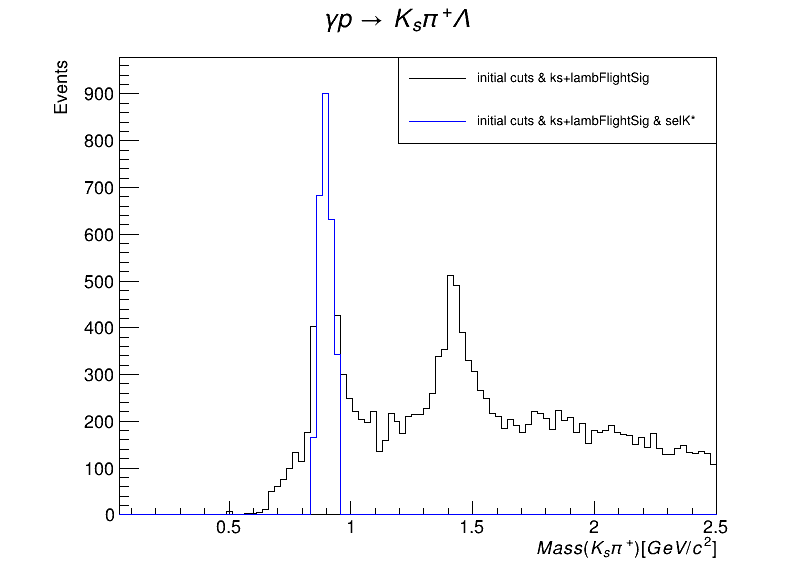

    CREATING HISTOGRAM... FSRootHist:000013   OKAY           (entries = 19230)
    CREATING HISTOGRAM... FSRootHist:000014   OKAY           (entries = 2724)


Info in <TCanvas::Print>: pdf file plots/KsPip_m.pdf has been created
Info in <TCanvas::Print>: png file plots/KsPip_m.png has been created


In [16]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = '\gamma p \\rightarrow K_{s} \pi^{+} \Lambda'
axisLabel = 'Mass (K_{s} \pi^{+})'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    # Clear cache when re-plotting/scaling/etc.
    ROOT.FSHistogram.clearHistogramCache()

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    # h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{PiPlus1})", "(100, 0.05, 2.5)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak)")
    h2 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{PiPlus1})", "(100, 0.05, 2.5)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,flightSigLambda)")
    h3 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{PiPlus1})", "(100, 0.05, 2.5)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,flightSigKShort,flightSigLambda,constrainKSTAR)")
    # h4 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{PiPlus1})", "(100, 0.05, 2.5)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,,constrainKShort,constrainLambda,flightSigKShort,flightSigLambda)")

    # h1.SetTitle("")
    # h1.SetTitle(plotTitle)
    # h1.SetStats(False)
    # h1.SetLineColor(ROOT.kBlack)
    # h1.GetXaxis().SetTitle(axisLabel + '[GeV/c^{2}]')
    # h1.GetYaxis().SetTitle('Events')
    # # h1.Scale(100)

    h2.SetTitle("")
    h2.SetTitle(plotTitle)
    h2.SetStats(False)
    h2.SetLineColor(ROOT.kBlack)
    h2.GetXaxis().SetTitle(axisLabel + '[GeV/c^{2}]')
    h2.GetYaxis().SetTitle('Events')

    h3.SetTitle("")
    h3.SetTitle(plotTitle)
    h3.SetStats(False)
    h3.SetLineColor(ROOT.kBlue)
    h3.GetXaxis().SetTitle(axisLabel + '[GeV/c^{2}]')
    h3.GetYaxis().SetTitle('Events')

    # h4.SetTitle("")
    # h4.SetTitle(plotTitle)
    # h4.SetStats(False)
    # h4.SetLineColor(ROOT.kRed)
    # h4.GetXaxis().SetTitle(axisLabel + '[GeV/c^{2}]')
    # h4.GetYaxis().SetTitle('Events')

    # h1.Draw('hist')
    h2.Draw('hist')
    h3.Draw('hist, same')
    # h4.Draw('hist')

    legend1 = ROOT.TLegend(0.50, 0.750, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    # legend1.AddEntry(h1, 'initial cuts', 'l')
    legend1.AddEntry(h2, 'initial cuts & ks+lambFlightSig', 'l')
    legend1.AddEntry(h3, 'initial cuts & ks+lambFlightSig & selK*', 'l')
    # legend1.AddEntry(h4, 'initial cuts & selKS-Lamb & ks+lambFlightSig', 'l')
    legend1.Draw('same')

    img_path = 'plots/KsPip_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### KShort Lambda

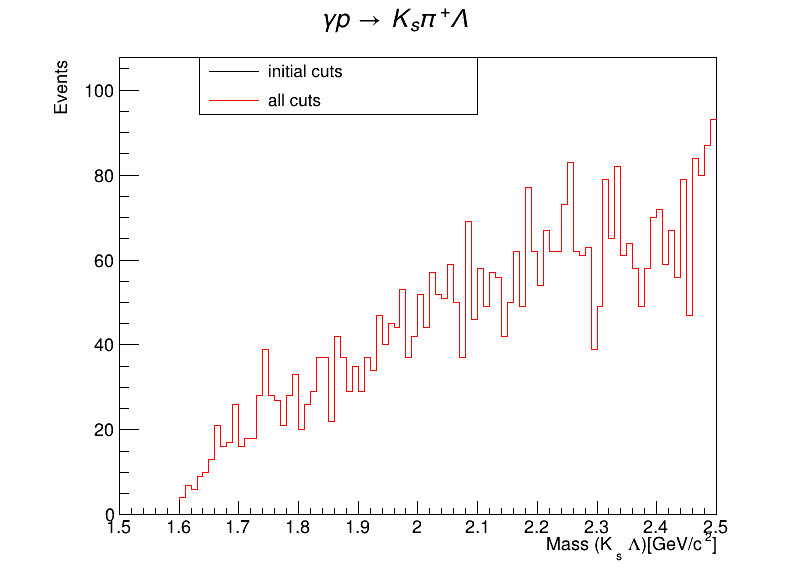

    CREATING HISTOGRAM... FSRootHist:000005   OKAY           (entries = 106021)
    CREATING HISTOGRAM... FSRootHist:000006   OKAY           (entries = 17535)


Info in <TCanvas::Print>: pdf file plots/KsLamb_m.pdf has been created
Info in <TCanvas::Print>: png file plots/KsLamb_m.png has been created


In [17]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = '\gamma p \\rightarrow K_{s} \pi^{+} \Lambda'
axisLabel = 'Mass (K_{s} #Lambda)'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    ROOT.FSHistogram.clearHistogramCache()

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)


    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{DecayingLambda})", "(100, 1.5, 2.5)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,constrainLambda,constrainKShort)")
    h2 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{DecayingLambda})", "(100, 1.5, 2.5)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,constrainLambda,constrainKShort,flightSigLambda,flightSigKShort)")

    h1.SetTitle("")
    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlack)
    h1.GetXaxis().SetTitle(axisLabel + '[GeV/c^{2}]')
    h1.GetYaxis().SetTitle('Events')

    h2.SetTitle("")
    h2.SetTitle(plotTitle)
    h2.SetStats(False)
    h2.SetLineColor(ROOT.kRed)
    h2.SetLineStyle(1)
    h2.GetXaxis().SetTitle(axisLabel + '[GeV/c^{2}]')
    h2.GetYaxis().SetTitle('Events')

    h1.Draw('hist')
    h2.Draw('hist')

    legend1 = ROOT.TLegend(0.25, 0.80, 0.60, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, 'initial cuts', 'l')
    legend1.AddEntry(h2, 'all cuts', 'l')
    legend1.Draw('same')

    img_path = 'plots/KsLamb_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### Lambda   (proton Pi Minus)

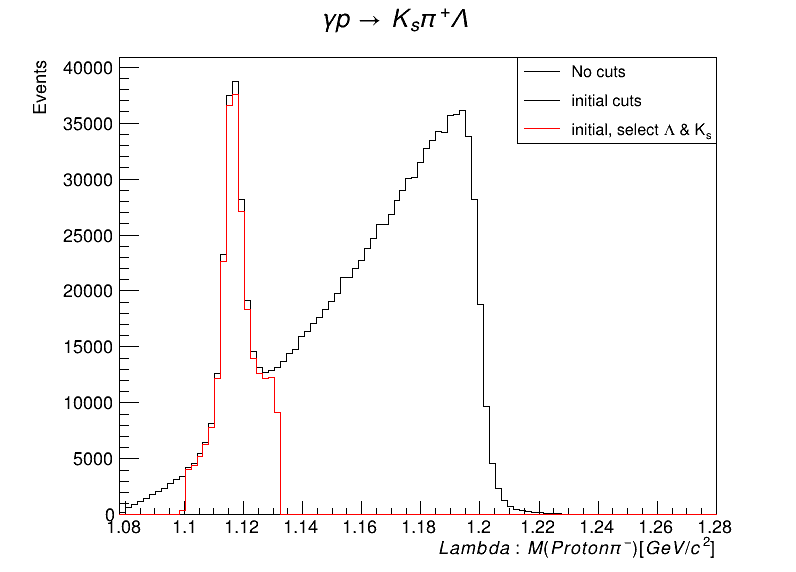

    CREATING HISTOGRAM... FSRootHist:000007   OKAY           (entries = 138409617)
    CREATING HISTOGRAM... FSRootHist:000008   OKAY           (entries = 1148987)
    CREATING HISTOGRAM... FSRootHist:000009   OKAY           (entries = 242785)


Info in <TCanvas::Print>: pdf file plots/Lambda_m.pdf has been created
Info in <TCanvas::Print>: png file plots/Lambda_m.png has been created


In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = '\gamma p \\rightarrow K_{s} \pi^{+} \Lambda'
axisLabel = 'Lambda: M(Proton \pi^{-})'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    # clear histogram cache
    ROOT.FSHistogram.clearHistogramCache()

    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({Proton}, {PiMinus2})", "(100, 1.078, 1.28)", "")
    h2 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({Proton}, {PiMinus2})", "(100, 1.078, 1.28)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak)")
    h3 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({Proton}, {PiMinus2})", "(100, 1.078, 1.28)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,constrainLambda,constrainKShort)")    

    h1.SetTitle("")
    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlack)
    h1.GetXaxis().SetTitle(axisLabel + '[GeV/c^{2}]')
    h1.GetYaxis().SetTitle('Events')
    # h1.Scale(100)

    h2.SetTitle("")
    h2.SetTitle(plotTitle)
    h2.SetStats(False)
    h2.SetLineColor(ROOT.kBlack)
    # h2.SetLineStyle(9) # set line type to dashed
    h2.SetLineWidth(1)
    h2.GetXaxis().SetTitle(axisLabel + '[GeV/c^{2}]')
    h2.GetYaxis().SetTitle('Events')
    # h2.Scale(2)

    h3.SetTitle("")
    h3.SetTitle(plotTitle)
    h3.SetStats(False)
    h3.SetLineColor(ROOT.kRed)
    h3.SetLineStyle(1)
    h3.SetLineWidth(1)
    h3.GetXaxis().SetTitle(axisLabel + '[GeV/c^{2}]')
    h3.GetYaxis().SetTitle('Events')

    # h1.Draw('hist')
    h2.Draw('hist')
    h3.Draw('same, hist')


    legend1 = ROOT.TLegend(0.65, 0.750, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, ' No cuts', 'l')
    legend1.AddEntry(h2, ' initial cuts', 'l')
    legend1.AddEntry(h3, ' initial, select #Lambda & K_{s}', 'l')
    legend1.Draw('same')

    img_path = 'plots/Lambda_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### Lambda sidebands

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = '\Lambda Sidebands'
axisLabel = 'Mass (Proton \pi^{-})'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    # clear histogram cache
    # ROOT.FSHistogram.clearHistogramCache()

    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({Proton}, {PiMinus2})", "(100, 1.08, 1.206)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak)")
    h2 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({Proton}, {PiMinus2})", "(100, 1.08, 1.206)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak)&&CUTSB(constrainLambda)")

    h1.SetTitle("")
    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlack)
    h1.GetXaxis().SetTitle(axisLabel + '[GeV/c^{2}]')
    h1.GetYaxis().SetTitle('Events')

    h2.SetTitle("")
    h2.SetTitle(plotTitle)
    h2.SetStats(False)
    h2.SetLineColor(ROOT.kRed)
    h2.GetXaxis().SetTitle(axisLabel + '[GeV/c^{2}]')
    h2.GetYaxis().SetTitle('Events')

    h1.Draw('hist')
    h2.Draw('hist, same')

    legend1 = ROOT.TLegend(0.65, 0.750, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, 'Static cuts', 'l')
    legend1.AddEntry(h2,'Static & #Lambda Sidebands', 'l')
    legend1.Draw('same')

    img_path = 'plots/LambdaSidebands_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### Lambda missing mass

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = '#Lambda Missing Mass'
axisLabel = '#Lambda Missing Mass'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)

    # clear histogram memory before printing the next one
    ROOT.FSHistogram.clearHistogramCache()

    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingLambda})", "(60, 1.07, 1.35)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak)")
    h1.SetTitle("")
    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kMagenta)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.GetYaxis().SetTitle('Events')
    h1.Draw('same, hist')


    legend1 = ROOT.TLegend(0.60, 0.80, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, plotTitle + ' cuts', 'l')
    legend1.Draw('same')

    img_path = 'plots/decayingLambda_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### Pi Plus

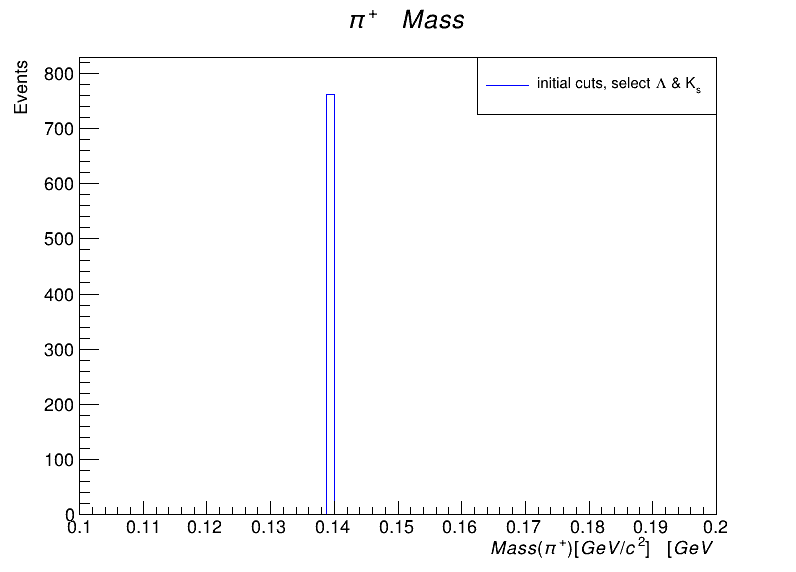

    FOUND HISTOGRAM...    FSRootHist:000002   OKAY           (entries = 762)


Info in <TCanvas::Print>: pdf file plots/PiPlus_m.pdf has been created
Info in <TCanvas::Print>: png file plots/PiPlus_m.png has been created


In [13]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = '$\pi^{+}$ Mass'
axisLabel = '$Mass (\pi^{+}) [GeV/c^{2}]$'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)

    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({PiPlus1})", "(80, 0.1, 0.2)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,constrainLambda,constrainKShort)")

    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel + ' [GeV')
    h1.GetYaxis().SetTitle('Events')
    h1.Draw('hist')
    
    legend1 = ROOT.TLegend(0.60, 0.80, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, 'initial cuts, select #Lambda & K_{s}', 'l')
    legend1.Draw('same')

    img_path = 'plots/PiPlus_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### Dalitz plots

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = '\gamma p \\rightarrow K_{s} \pi^{+} \Lambda'
YaxisLabel = 'M(K_{s} \pi^{+})^{2}'
XaxisLabel = 'M(\Lambda \pi^{+})^{2}'

# INDICES ASSIGNED BY flatten.  Use leading values, not those in parentheses.
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)

    h1 = ROOT.FSHistogram.getTH2F(fileName, treeName, f"MASS2({DecayingKShort},{PiPlus1}):MASS2({DecayingLambda},{PiPlus1})", "(80, 1.6, 2.6, 80, 0.6, 5.2)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,constrainLambda,constrainKShort)") # MASS2(y-axis1,y-axis2):MASS2(x-axis1,x-axis2), "x_bins, x_min, x_max, y_bins, y_min, y_max"

    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(XaxisLabel + ' [GeV^{2}]')
    h1.GetYaxis().SetTitle(YaxisLabel + ' [GeV^{2}]')
    h1.Draw('colz')
    
    legend1 = ROOT.TLegend(0.60, 0.80, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, plotTitle, 'l')
    # legend1.Draw('same')

    img_path = 'plots/KsPipVSLambPip_m2'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### 2D mass plots

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = '\gamma p \\rightarrow K_{s} \pi^{+} \Lambda'
YaxisLabel = 'M(Proton \pi^{-})'
XaxisLabel = 'M(KShort \pi^{+})'

# INDICES ASSIGNED BY flatten.  Use leading values, not those in parentheses.
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)

    # clear histogram memory before printing the next one
    ROOT.FSHistogram.clearHistogramCache()

    h1 = ROOT.FSHistogram.getTH2F(fileName, treeName, f"MASS({Proton},{PiMinus2}):MASS({DecayingKShort},{PiPlus1})", "(80, 0.42, 4.5, 80, 1.2, 1.5)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,constrainLambda,constrainKShort)") # MASS2(y-axis1,y-axis2):MASS2(x-axis1,x-axis2), "x_bins, x_min, x_max, y_bins, y_min, y_max"

    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(XaxisLabel + ' [GeV^{2}]')
    h1.GetYaxis().SetTitle(YaxisLabel + ' [GeV^{2}]')
    h1.Draw('colz')
    
    legend1 = ROOT.TLegend(0.60, 0.80, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, plotTitle, 'l')
    # legend1.Draw('same')

    img_path = 'plots/Lamb_VS_KsPip_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### KShort

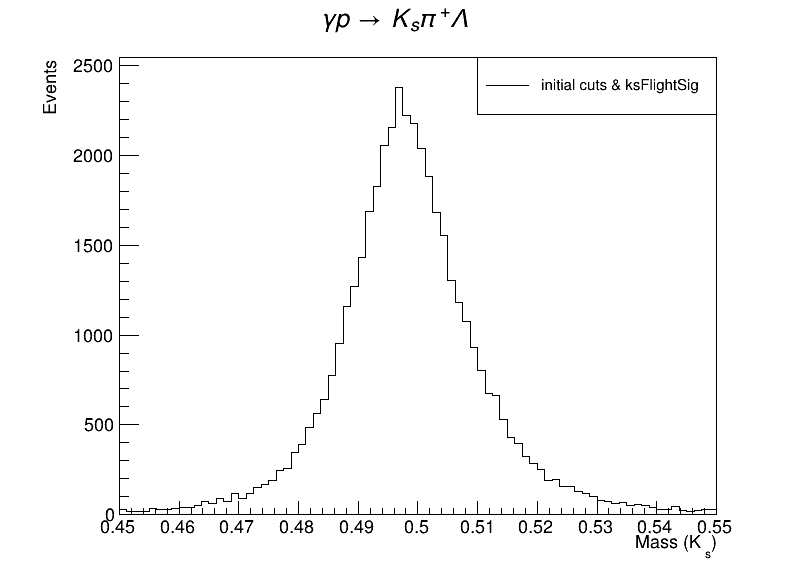

    CREATING HISTOGRAM... FSRootHist:000019   OKAY           (entries = 21153355)
    CREATING HISTOGRAM... FSRootHist:000020   OKAY           (entries = 42306)


Info in <TCanvas::Print>: pdf file plots/ks_m.pdf has been created
Info in <TCanvas::Print>: png file plots/ks_m.png has been created


In [26]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = '\gamma p \\rightarrow K_{s} \pi^{+} \Lambda'
axisLabel = 'Mass (K_{s})'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    ROOT.FSHistogram.clearHistogramCache()

    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort})", "(80, 0.45, 0.55)", "CUT(flightSigKShort)")
    h2 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort})", "(80, 0.45, 0.55)", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak,constrainLambda,constrainKShort,flightSigKShort)")

    h1.SetTitle("")
    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel + ' [GeV/c^{2}]')
    h1.GetYaxis().SetTitle('Events')
    # h1.Draw('hist')

    h2.SetTitle("")
    h2.SetTitle(plotTitle)
    h2.SetStats(False)
    h2.SetLineColor(ROOT.kBlack)
    h2.GetXaxis().SetTitle(axisLabel)
    h2.GetYaxis().SetTitle('Events')
    h2.Draw('same, hist')


    legend1 = ROOT.TLegend(0.60, 0.80, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    # legend1.AddEntry(h1, ' initial cuts', 'l')
    legend1.AddEntry(h2, ' initial cuts & ksFlightSig', 'l')

    legend1.Draw('same')

    img_path = 'plots/ks_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### FSModeHistogram ...

In [22]:
#  bggen, plot, but use "FSModeHistogram" instead of "FSHistogram"

# kvin 3/4/25

### flight sig

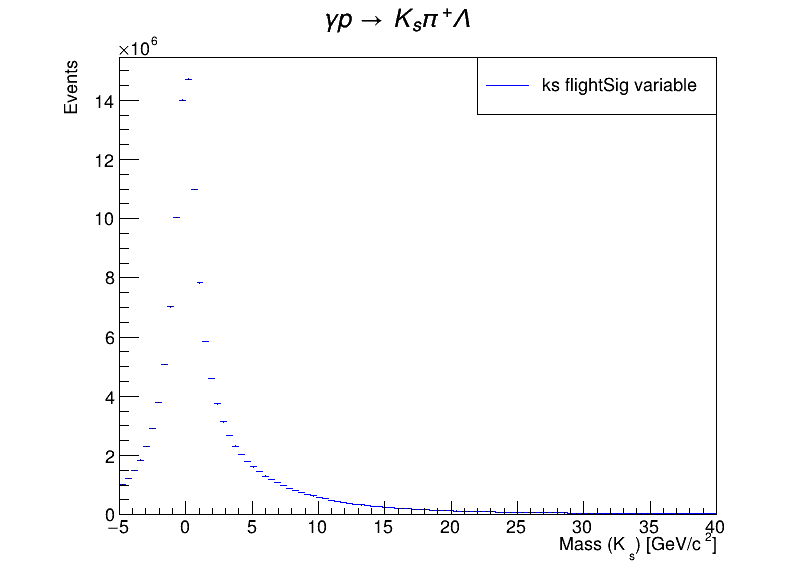

    CREATING HISTOGRAM... FSRootHist:000001   OKAY           (entries = 138409617)


Info in <TCanvas::Print>: png file plots/VeeLP1.png has been created


In [3]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = '\gamma p \\rightarrow K_{s} \pi^{+} \Lambda'
axisLabel = 'Mass (K_{s})'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)



def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    ROOT.FSHistogram.clearHistogramCache()

    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, "VeeLP1", "(100, -5.0, 40.0)", "")
                                  
    # h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort})", "(80, 0.45, 0.55)", "CUT(flightSigKShort)&&MAXEVENTS==10000")


    h1.SetTitle("")
    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel + ' [GeV/c^{2}]')
    h1.GetYaxis().SetTitle('Events')
    h1.Draw('')

    legend1 = ROOT.TLegend(0.60, 0.80, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, ' ks flightSig variable', 'l')

    legend1.Draw('same')

    img_path = 'plots/VeeLP1'
    # canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    # os.remove(img_path + '.png')

plot_hist()

### Beam Energy

In [ ]:
from IPython.display import Image, display

plotTitle = 'Beam energy'
plot2Title = 'Beam energy measured'
axisLabel = 'Beam energy [GeV]'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

canvas = ROOT.TCanvas('c', 'c', 800, 600)
    
h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, "beam_e", "(80, 0.0, 14.0)", "")
h1.SetStats(False)
h1.SetLineColor(ROOT.kBlue)
h1.GetXaxis().SetTitle(axisLabel)
h1.GetYaxis().SetTitle('Events')
h1.Draw()

h2 = ROOT.FSHistogram.getTH1F(fileName, treeName, "beam_e_measured", "(80, 0.0, 14.0)", "")
h2.SetStats(False)
h2.SetMarkerStyle(24)
h2.SetMarkerColor(ROOT.kRed)
h2.GetXaxis().SetTitle(axisLabel)
h2.GetYaxis().SetTitle('Events')
h2.Draw('p same')
    
legend1 = ROOT.TLegend(0.7, 0.9, 0.9, 0.75)
# legend1.AddEntry(h1.GetValue(), plotTitle, 'l')
# legend1.AddEntry(h2.GetValue(), plot2Title, 'p')
legend1.Draw('same')

img_path = 'plots/beam_e.png'
canvas.SaveAs(img_path)
canvas.Close()
display(Image(filename=img_path))

### Target proton

In [ ]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
latex = ROOT.TLatex()

plotTitle = 'Target proton mass'
axisLabel = 'Mass (target proton) [GeV/c^{2}]'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({?????})", "(80, 0.0, 4.0)", "")
    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.GetYaxis().SetTitle('Events')
    h1.Draw()
    latex.DrawLatexNDC(0.3, 0.95, plotTitle)
    
    legend1 = ROOT.TLegend(0.7, 0.9, 0.9, 0.85)
    legend1.AddEntry(h1, f'{plotTitle} no cuts', 'l')
    legend1.Draw('same')

    img_path = 'plots/target_m_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### KShort Pi Plus Lambda

In [ ]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Mass (K_{s} \pi^{+} #Lambda)'
axisLabel = 'Mass (K_{s} \pi^{+} p \pi^{-})'

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)   2b. PiMinus1 (5)
# 3. PiPlus1 (6)

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingKShort},{PiPlus1},{Proton},{PiMinus2})", "(80, 2.5, 4.8)", "")

    # FOR MULTIPLE FINAL STATES AND TO MANAGE PARTICLE COMBINATORICS WITHIN THOSE FINAL STATES.    
    # h1 = ROOT.FSModeHistogram.getTH1F(fileName, treeName, f"MASS({KPlus},{DecayingPi0},{Proton},{PiMinus})", "(80, 0.0, 4.0)", "", "CUT(chi2DOF,unusedE,unusedTracks,coherentPeak)&&CUTSB(constrainLambda)")
    
    h1.SetTitle("")
    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel + ' [GeV/c^{2}]')
    h1.GetYaxis().SetTitle('Events')
    h1.Draw('hist')
    
    legend1 = ROOT.TLegend(0.60, 0.80, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, plotTitle + ' no cuts', 'l')
    legend1.Draw('same')

    img_path = 'plots/KsPipLamb_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()